In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
# Import dataset
charity_df = pd.read_csv("charity_data.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
charity_df.head(3)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [3]:
# Check status column
charity_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [4]:
# Drop unnessary columns for the feature df
features_df = charity_df.drop(["EIN", "STATUS", "IS_SUCCESSFUL"],1)
features_df.head(1)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,N,5000


In [5]:
# Check features df data types
features_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
dtype: object

In [6]:
# Generate categorical variable list
features_cat = features_df.dtypes[features_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
features_df[features_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [7]:
# Bucketing APPLICATION_TYPE

# Check APPLICATION_TYPE unique values to see the required binning
application_counts = features_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

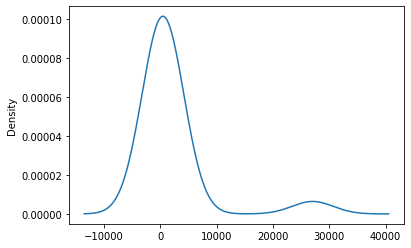

In [8]:
# Visualize the value counts
application_counts.plot.density()

In [9]:
# Determine which values to replace
replace_application_type = list(application_counts[application_counts < 200].index)

# Replace in DF
for application in replace_application_type:
    features_df.APPLICATION_TYPE = features_df.APPLICATION_TYPE.replace(application, "Other")

# Check to make sure binning was successful
features_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Bucketing NAME

# Check APPLICATION_TYPE unique values to see the required binning
name_counts = features_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                                    1260
TOPS CLUB INC                                                              765
UNITED STATES BOWLING CONGRESS INC                                         700
WASHINGTON STATE UNIVERSITY                                                492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                            408
PTA TEXAS CONGRESS                                                         368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                              331
ALPHA PHI SIGMA                                                            313
TOASTMASTERS INTERNATIONAL                                                 293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                          287
LITTLE LEAGUE BASEBALL INC                                                 277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                   266
MOMS CLUB                                           

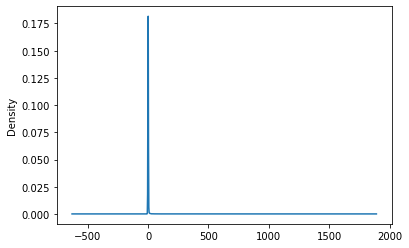

In [11]:
# Visualize the value counts
name_counts.plot.density()

In [12]:
# Determine which values to replace
replace_name_type = list(name_counts[name_counts < 139].index)

# Replace in DF
for name in replace_name_type:
    features_df.NAME = features_df.NAME.replace(name, "Other")

# Check to make sure binning was successful
features_df.NAME.value_counts()

Other                                                                 27013
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [13]:
# Bucketing CLASSIFICATION

# Check CLASSIFICATION unique values to see the required binning
classification_counts = features_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C2400        6
C1720        6
C1600        5
C1257        5
C2710        3
C1260        3
C0           3
C1267        2
C1234        2
C3200        2
C1256        2
C1246        2
C1820        1
C1248        1
C2190        1
C2150        1
C1570        1
C1245        1
C2570        1
C2380        1
C1732        1
C1900        1
C3700        1
C8210        1
C2500        1
C2170        1
C2561        1
C1283        1
C2600        1
C1728        1
C4200        1
C1236        1
C6100        1
C5200     

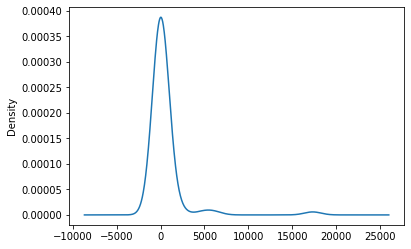

In [14]:
# Visualize the value counts
classification_counts.plot.density()

In [15]:
# Determine which values to replace
replace_classification_type = list(classification_counts[classification_counts < 100].index)

# Replace in DF
for classification in replace_classification_type:
    features_df.CLASSIFICATION = features_df.CLASSIFICATION.replace(classification, "Other")

# Check to make sure binning was successful
features_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [16]:
# Re-check the number of unique values in each column
features_df[features_cat].nunique()

NAME                      22
APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION            12
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the onhotencoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(features_df[features_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(features_cat)
encode_df.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_KNIGHTS OF COLUMBUS,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_PTA UTAH CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TENNESSEE ORDER OF THE EASTERN STAR,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge the encoded features and drop the non-encoded columns
features_df = features_df.merge(encode_df, left_index=True, right_index=True)
features_df = features_df.drop(features_cat,1)
features_df.head()

,ASK_AMT,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_KNIGHTS OF COLUMBUS,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_PTA UTAH CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TENNESSEE ORDER OF THE EASTERN STAR,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Split preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"]
X = features_df

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[-0.03145581, -0.09622504, -0.10733765, ..., -0.07126932,
         0.02858365, -0.02858365],
       [-0.03145581, -0.09622504, -0.10733765, ..., -0.07126932,
         0.02858365, -0.02858365],
       [-0.03145581, -0.09622504, -0.10733765, ..., -0.07126932,
         0.02858365, -0.02858365],
       ...,
       [-0.03145581, -0.09622504, -0.10733765, ..., -0.07126932,
         0.02858365, -0.02858365],
       [-0.03145581, -0.09622504, -0.10733765, ..., -0.07126932,
         0.02858365, -0.02858365],
       [-0.03145581, -0.09622504, -0.10733765, ..., -0.07126932,
         0.02858365, -0.02858365]])

In [21]:
# Create a neural network model with keras
nn = tf.keras.models.Sequential()

# Add a hidden layer with twice as many neurons as there are inputs. 
number_input_features = len(X.columns)
hidden_nodes_layer1 = .66*number_input_features
hidden_nodes_layer2 = .66*number_input_features
hidden_nodes_layer3 = .66*number_input_features

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 46)                3266      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 47        
Total params: 7,637
Trainable params: 7,637
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, np.asarray(y_train), epochs=30)

Train on 25724 samples
Epoch 1/30
25724/25724 [==============================] - 5s 211us/sample - loss: 0.5248 - accuracy: 0.7365
Epoch 2/30
25724/25724 [==============================] - 3s 115us/sample - loss: 0.5011 - accuracy: 0.7512
Epoch 3/30
25724/25724 [==============================] - 3s 136us/sample - loss: 0.4976 - accuracy: 0.7551
Epoch 4/30
25724/25724 [==============================] - 3s 119us/sample - loss: 0.4958 - accuracy: 0.7556
Epoch 5/30
25724/25724 [==============================] - 3s 118us/sample - loss: 0.4944 - accuracy: 0.7568
Epoch 6/30
25724/25724 [==============================] - 3s 127us/sample - loss: 0.4931 - accuracy: 0.7568
Epoch 7/30
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4926 - accuracy: 0.7573
Epoch 8/30
25724/25724 [==============================] - 3s 132us/sample - loss: 0.4919 - accuracy: 0.7573
Epoch 9/30
25724/25724 [==============================] - 3s 128us/sample - loss: 0.4915 - accuracy: 0.7577
Epoch

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, np.asarray(y_test), verbose=2)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5217 - accuracy: 0.7506
Test Loss: 0.5050162258301115, Test Accuracy: 0.7505539655685425
